# Construção de Regressões Lineares em Python: Aplicação no Design de Fármacos

Um pesquisador obteve e organizou diversas propriedades moleculares de compostos químicos e agora busca correlacioná-las com a atividade biológica desses compostos em uma linha celular de leucemia (L1210). Seu objetivo é construir regressões lineares e uma regressão linear múltipla considerando todas as propriedades moleculares disponíveis.

1. **Construção de Regressões Lineares Simples:**
   - Realize regressões lineares simples para cada propriedade molecular em relação à atividade biológica (IC50 ou log(IC50)).
   - Exiba os gráficos das regressões simples, com as propriedades moleculares no eixo X e o log(IC50) no eixo Y.

2. **Construção de Regressão Linear Múltipla:**
   - Realize uma regressão linear múltipla considerando todas as propriedades moleculares como variáveis independentes e a atividade biológica como variável dependente.
   - Exiba as métricas da regressão linear múltipla, como o coeficiente de determinação (R²) e os coeficientes da regressão, de forma textual.




Coeficientes da Regressão Linear Múltipla

Termo independente: -11.399675595519142
Demais coeficientes: [ 0.88168202  0.00619429 -5.79396453]

R-quadrado: 0.550473308719637


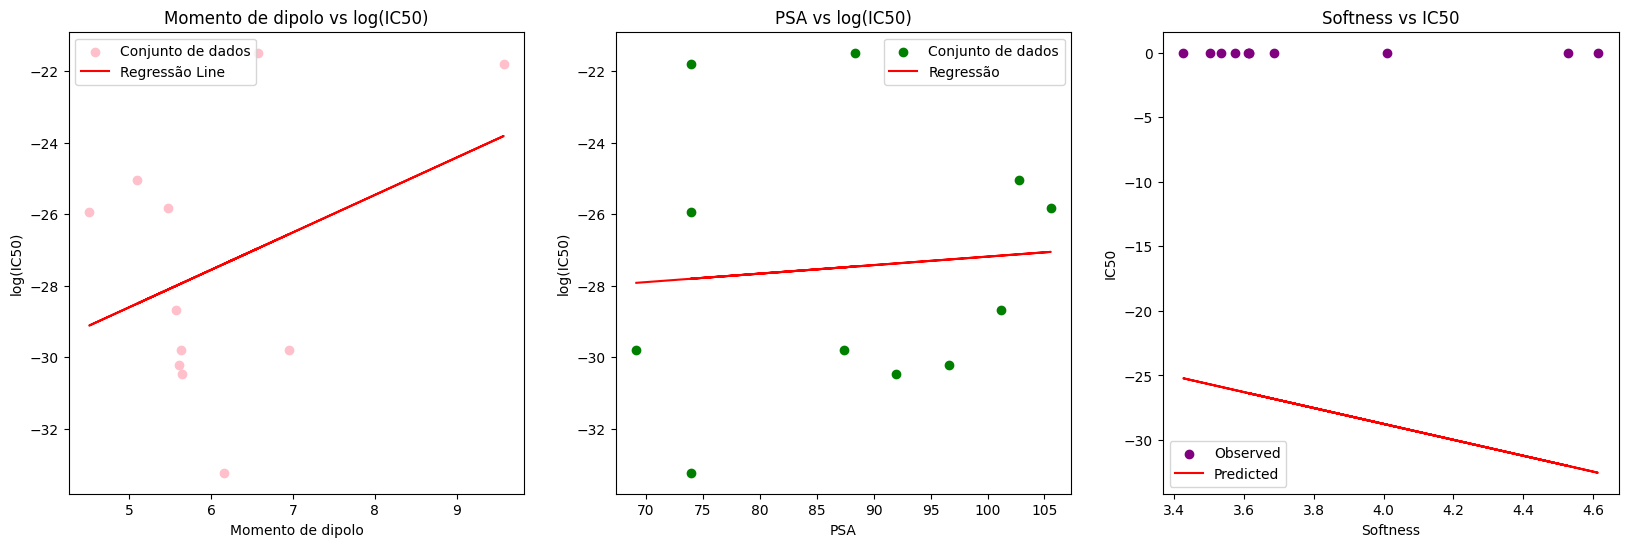

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#DADOS DO ARTIGO: https://doi.org/10.3390/molecules25010024

#Dados
data = {
    "IC50": [1.148154e-13, 5.888437e-14, 7.585776e-14, 3.548134e-13, 6.165950e-12, 1.348963e-11, 3.388442e-10, 3.715352e-15, 4.677351e-10, 5.370318e-12, 1.148154e-13],
    "Dipole_Moment": [5.636, 5.646, 5.610, 5.575, 5.475, 5.099, 9.575, 6.154, 6.567, 4.510, 6.952],
    "PSA": [87.38, 91.98, 96.58, 101.18, 105.55, 102.75, 73.94, 73.94, 88.38, 73.94, 69.18],
    "Softness": [3.615, 4.613, 3.614, 3.576, 3.535, 3.502, 3.427, 4.528, 3.612, 3.685, 4.011]

}

#Converte os dados do formato de lista para o formato de dataframe
df = pd.DataFrame(data)

# O log é do IC50 é calculado como forma de normalização dos dados
df['log_IC50'] = np.log(df['IC50'])

# Regressão para Momento de dipolo vs log(IC50)
dipole_model = LinearRegression()
dipole_model.fit(df[['Dipole_Moment']], df['log_IC50'])
dipole_pred = dipole_model.predict(df[['Dipole_Moment']])

# Regressão para TPSA vs log(IC50)
tpsa_model = LinearRegression()
tpsa_model.fit(df[['PSA']], df['log_IC50'])
tpsa_pred = tpsa_model.predict(df[['PSA']])

# Regressão para TPSA vs Softness
softness_model = LinearRegression()
softness_model.fit(df[['Softness']], df['log_IC50'])
softness_pred = softness_model.predict(df[['Softness']])

# Constrói uma regressão linear múltipla usando o Momento de Dipolo, PSA e o caráter mácio
X = df[['Dipole_Moment', 'PSA','Softness']]  # Variáveis independentes (X) -> Vetor de variáveis independentes
y = df['log_IC50']  # Variável predita (Y)
model = LinearRegression()
model.fit(X, y)

# Visualização da figura
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Momento de dipolo vs log(IC50)
ax[0].scatter(df['Dipole_Moment'], df['log_IC50'], color='pink', label='Conjunto de dados')
ax[0].plot(df['Dipole_Moment'], dipole_pred, color='red', label='Regressão Line')
ax[0].set_title("Momento de dipolo vs log(IC50)")
ax[0].set_xlabel("Momento de dipolo")
ax[0].set_ylabel("log(IC50)")
ax[0].legend()

# TPSA vs log(IC50)
ax[1].scatter(df['PSA'], df['log_IC50'], color='green', label='Conjunto de dados')
ax[1].plot(df['PSA'], tpsa_pred, color='red', label='Regressão')
ax[1].set_title("PSA vs log(IC50)")
ax[1].set_xlabel("PSA")
ax[1].set_ylabel("log(IC50)")
ax[1].legend()

# Softness vs IC50
ax[2].scatter(df['Softness'], df['IC50'], color='purple', label='Observed')
ax[2].plot(df['Softness'],softness_pred , color='red', label='Predicted')
ax[2].set_title("Softness vs IC50")
ax[2].set_xlabel("Softness")
ax[2].set_ylabel("IC50")
ax[2].legend()

# Exibe os coeficientes do modelo de regressão linear múltipla
print("\nCoeficientes da Regressão Linear Múltipla\n")
print(f"Termo independente: {model.intercept_}")
print(f"Demais coeficientes: {model.coef_}")

# Calcula o R^2 para regressão multilinear
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"\nR-quadrado: {r2}")